In [1]:
data_arr = []
for _ in range(14):
    data_arr.append([])

f = open("housing.csv", "r")
while (True):
    line_split = f.readline().split()
    if len(line_split) < 14:
        break
    for i in range(14):
        data_arr[i].append(line_split[i])

col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', \
           'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

d = {}
for i in range(len(col_name)):
    d[col_name[i]] = data_arr[i]

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=d, dtype=np.float32)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
 13  MEDV     506 non-null    float32
dtypes: float32(14)
memory usage: 27.8 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136780,0.069170,0.554695,6.284634,68.574898,3.795043,9.549407,408.237152,18.455534,356.674042,12.653064,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537109,2.164946,91.294861,7.141061,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [6]:
def min_max_normalize(dataset):
    data_norm = (dataset-dataset.min())/(dataset.max()-dataset.min())
    data_norm['MEDV'] = dataset['MEDV']
    return data_norm

In [7]:
df = min_max_normalize(df)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,21.200001
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


In [9]:
label = df['MEDV']
features = df.drop(['MEDV'], axis=1)

In [10]:
print(df.shape)
print(label.shape)
print(features.shape)

(506, 14)
(506,)
(506, 13)


In [11]:
import sklearn.model_selection as sk
X_train, X_test, y_train, y_test = sk.train_test_split(features,label, test_size=0.2, random_state=1234)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [13]:
# model1 : using SGD optimizer

from tensorflow import keras

model1 = keras.Sequential()
model1.add(keras.layers.Dense(10, activation='relu', input_shape=(13,))) # count(nodes) = count(input+output) * (2/3)
model1.add(keras.layers.Dense(1))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [14]:
import tensorflow as tf

model1.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1),
    loss='mse',
    metrics=[
        keras.metrics.MeanSquaredError(),
        keras.metrics.MeanAbsoluteError()
    ]
)
history1 = model1.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
11/11 [==============================] - 0s 15ms/step - loss: 234.4239 - mean_squared_error: 234.4239 - mean_absolute_error: 12.0931 - val_loss: 375.9373 - val_mean_squared_error: 375.9373 - val_mean_absolute_error: 18.3813
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 106.5970 - mean_squared_error: 106.5970 - mean_absolute_error: 7.3525 - val_loss: 102.8748 - val_mean_squared_error: 102.8748 - val_mean_absolute_error: 6.7151
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 76.9132 - mean_squared_error: 76.9132 - mean_absolute_error: 6.2756 - val_loss: 98.9840 - val_mean_squared_error: 98.9840 - val_mean_absolute_error: 6.6693
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 76.2116 - mean_squared_error: 76.2116 - mean_absolute_error: 6.3227 - val_loss: 98.6762 - val_mean_squared_error: 98.6762 - val_mean_absolute_error: 6.6683
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 75.95

11/11 [==============================] - 0s 2ms/step - loss: 75.8007 - mean_squared_error: 75.8007 - mean_absolute_error: 6.3628 - val_loss: 96.3908 - val_mean_squared_error: 96.3908 - val_mean_absolute_error: 6.6917
Epoch 36/50
11/11 [==============================] - 0s 2ms/step - loss: 76.1883 - mean_squared_error: 76.1883 - mean_absolute_error: 6.3333 - val_loss: 96.2144 - val_mean_squared_error: 96.2144 - val_mean_absolute_error: 6.6969
Epoch 37/50
11/11 [==============================] - 0s 2ms/step - loss: 75.7901 - mean_squared_error: 75.7901 - mean_absolute_error: 6.3529 - val_loss: 95.4831 - val_mean_squared_error: 95.4831 - val_mean_absolute_error: 6.9759
Epoch 38/50
11/11 [==============================] - 0s 2ms/step - loss: 77.0180 - mean_squared_error: 77.0180 - mean_absolute_error: 6.5069 - val_loss: 97.2969 - val_mean_squared_error: 97.2969 - val_mean_absolute_error: 6.6702
Epoch 39/50
11/11 [==============================] - 0s 2ms/step - loss: 75.9491 - mean_squared_

In [15]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

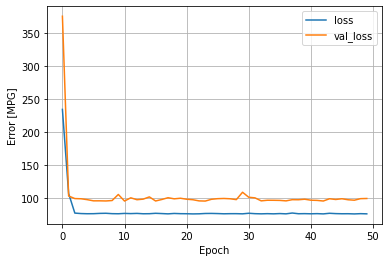

In [16]:
plot_loss(history1)

In [17]:
def mean_percentage(X_test, y_test, model):
    predicted = model.predict(X_test)

    truth = []
    for val in y_test:
        truth.append(val)

    diff_percentages = []    
    for i in range(len(y_test)):
        diff = predicted[i] - truth[i]
        diff_per = abs(diff*100/truth[i])
        diff_percentages.append(diff_per)

    precision = 100 - sum(diff_percentages)/len(diff_percentages)
    return precision

In [18]:
mean_percentage(X_test, y_test, model1)

array([59.096943], dtype=float32)

In [19]:
model1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 105.0854 - mean_squared_error: 105.0854 - mean_absolute_error: 7.3671


[105.08541107177734, 105.08541107177734, 7.367137908935547]

In [20]:
# model2 : using Adam optimizer

model2 = keras.Sequential()
model2.add(keras.layers.Dense(10, activation='relu', input_shape=(13,))) # count(nodes) = count(input+output) * (2/3)
model2.add(keras.layers.Dense(1))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mse',
    metrics=[
        keras.metrics.MeanSquaredError(),
        keras.metrics.MeanAbsoluteError()
    ]
)
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
11/11 [==============================] - 0s 14ms/step - loss: 375.9924 - mean_squared_error: 375.9924 - mean_absolute_error: 16.7501 - val_loss: 140.7706 - val_mean_squared_error: 140.7706 - val_mean_absolute_error: 9.1251
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 139.5465 - mean_squared_error: 139.5465 - mean_absolute_error: 9.1904 - val_loss: 106.1763 - val_mean_squared_error: 106.1763 - val_mean_absolute_error: 7.5562
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 84.7063 - mean_squared_error: 84.7063 - mean_absolute_error: 6.7572 - val_loss: 89.6607 - val_mean_squared_error: 89.6607 - val_mean_absolute_error: 6.4260
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 60.3554 - mean_squared_error: 60.3554 - mean_absolute_error: 5.9312 - val_loss: 71.3546 - val_mean_squared_error: 71.3546 - val_mean_absolute_error: 5.9995
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 49.560

Epoch 37/50
11/11 [==============================] - 0s 3ms/step - loss: 17.0091 - mean_squared_error: 17.0091 - mean_absolute_error: 2.9977 - val_loss: 46.0833 - val_mean_squared_error: 46.0833 - val_mean_absolute_error: 3.6519
Epoch 38/50
11/11 [==============================] - 0s 2ms/step - loss: 14.1333 - mean_squared_error: 14.1333 - mean_absolute_error: 2.7110 - val_loss: 46.0819 - val_mean_squared_error: 46.0819 - val_mean_absolute_error: 3.5365
Epoch 39/50
11/11 [==============================] - 0s 2ms/step - loss: 13.8712 - mean_squared_error: 13.8712 - mean_absolute_error: 2.6239 - val_loss: 43.2888 - val_mean_squared_error: 43.2888 - val_mean_absolute_error: 3.5152
Epoch 40/50
11/11 [==============================] - 0s 2ms/step - loss: 13.9705 - mean_squared_error: 13.9705 - mean_absolute_error: 2.6346 - val_loss: 43.3403 - val_mean_squared_error: 43.3403 - val_mean_absolute_error: 3.5797
Epoch 41/50
11/11 [==============================] - 0s 2ms/step - loss: 14.7283 - m

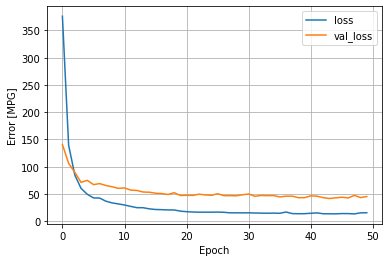

In [22]:
plot_loss(history2)

In [23]:
mean_percentage(X_test, y_test, model2)

array([82.524704], dtype=float32)

In [24]:
model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 17.0671 - mean_squared_error: 17.0671 - mean_absolute_error: 3.0854


[17.06710433959961, 17.06710433959961, 3.0854153633117676]